# DocBins Annotations Exploration




In [1]:
import os
import pandas as pd
import spacy
from spacy.tokens import DocBin

import matplotlib.pyplot as plt
import seaborn as sns


/opt/homebrew/Caskroom/miniforge/base/envs/prodigy-py39/lib/python3.9/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/opt/homebrew/Caskroom/miniforge/base/envs/prodigy-py39/lib/python3.9/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]


## Read the serialized bytes from the file

In [2]:
bin_path = os.path.join('datasets', 'spacy')

In [3]:
jsonl = []

nlp = spacy.load("fr_spacy_custom_spancat_edda")

for dataset in ["train", "dev", "val"]:
    with open(os.path.join(bin_path, dataset+'.spacy'), "rb") as f:
        serialized_bytes = f.read()

    doc_bin = DocBin().from_bytes(serialized_bytes)

    docs = list(doc_bin.get_docs(nlp.vocab))

    for doc in docs:
        jsonl.append(dict(dict({'dataset':dataset}, **doc._.meta), **doc.to_json()))

* The meta entry from the jsonl file has not been stored in the serialized bytes format. For a more detailed exploration see notebook `jsonl_exploration.ipynb`

In [4]:
jsonl[0]


{'dataset': 'train',
 'text': " ILLESCAS, (Géog.) petite ville d'Espagne, dans la nouvelle Castille, à six lieues au sud de Madrid. ",
 'sents': [{'start': 0, 'end': 18}, {'start': 19, 'end': 100}],
 'tokens': [{'id': 0, 'start': 0, 'end': 1},
  {'id': 1, 'start': 1, 'end': 9},
  {'id': 2, 'start': 9, 'end': 10},
  {'id': 3, 'start': 11, 'end': 12},
  {'id': 4, 'start': 12, 'end': 16},
  {'id': 5, 'start': 16, 'end': 17},
  {'id': 6, 'start': 17, 'end': 18},
  {'id': 7, 'start': 19, 'end': 25},
  {'id': 8, 'start': 26, 'end': 31},
  {'id': 9, 'start': 32, 'end': 34},
  {'id': 10, 'start': 34, 'end': 41},
  {'id': 11, 'start': 41, 'end': 42},
  {'id': 12, 'start': 43, 'end': 47},
  {'id': 13, 'start': 48, 'end': 50},
  {'id': 14, 'start': 51, 'end': 59},
  {'id': 15, 'start': 60, 'end': 68},
  {'id': 16, 'start': 68, 'end': 69},
  {'id': 17, 'start': 70, 'end': 71},
  {'id': 18, 'start': 72, 'end': 75},
  {'id': 19, 'start': 76, 'end': 82},
  {'id': 20, 'start': 83, 'end': 85},
  {'id':

In [5]:
df = pd.DataFrame(jsonl)

df.head()

,dataset,text,sents,tokens,spans
0,train,"ILLESCAS, (Géog.) petite ville d'Espagne, dan...","[{'start': 0, 'end': 18}, {'start': 19, 'end':...","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 1, 'end': 9, 'label': 'Head'..."
1,train,"MULHAUSEN, (Géog.) ville impériale d'Allemagn...","[{'start': 0, 'end': 19}, {'start': 20, 'end':...","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 1, 'end': 10, 'label': 'Head..."
2,train,"* ADDA, riviere de Suisse & d'Italie, qui a s...","[{'start': 0, 'end': 137}]","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 3, 'end': 7, 'label': 'Head'..."
3,train,"SINTRA ou CINTRA, (Géog. mod.) montagne de Po...","[{'start': 0, 'end': 25}, {'start': 26, 'end':...","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 1, 'end': 17, 'label': 'Head..."
4,train,"* ACHSTEDE, ou AKSTEDE, s. petite Ville d'All...","[{'start': 0, 'end': 87}]","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 3, 'end': 23, 'label': 'Head..."


### Number of paragraphs

In [6]:
len(df)

2200

## Count the spans

In [7]:
def get_number_spans(data):
    d = {}
    for obj in data:
        for span in obj['spans']['sc']:
                k = span['label']
                if k not in d:
                    d[k] = 1
                else:
                    d[k] += 1
    return d


def plot_pie_chart_spans(spans, ordered_list=None):
    if ordered_list is not None:
        sorted_data = {tag: spans[tag] for tag in ordered_list if tag in spans}
    else:
        sorted_data = spans
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(8, 8))
    plt.pie(list(sorted_data.values()), colors = sns.color_palette("Paired"), labels=list(sorted_data.keys()), autopct='%1.1f%%', startangle=90)


* Get distribution of spans for each dataset

{'Head': 1264, 'Domain-mark': 1069, 'NC-Spatial': 3268, 'ENE-Spatial': 3044, 'NP-Spatial': 4719, 'Relation': 2101, 'NC-Person': 1378, 'ENE-Person': 491, 'NP-Person': 1603, 'NP-Misc': 953, 'Latlong': 553, 'ENE-Misc': 255}


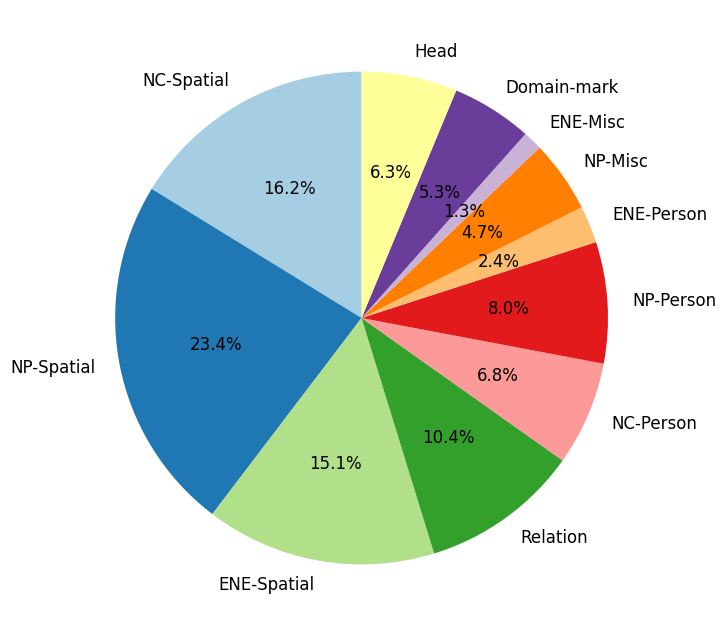

In [8]:
data_train = df[df.dataset == 'train'].to_dict(orient='records')

spans = get_number_spans(data_train)
print(spans)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

{'Head': 143, 'Domain-mark': 122, 'NC-Spatial': 358, 'ENE-Spatial': 326, 'NP-Spatial': 464, 'Relation': 220, 'Latlong': 66, 'NP-Person': 170, 'NC-Person': 132, 'ENE-Person': 49, 'NP-Misc': 108, 'ENE-Misc': 31}


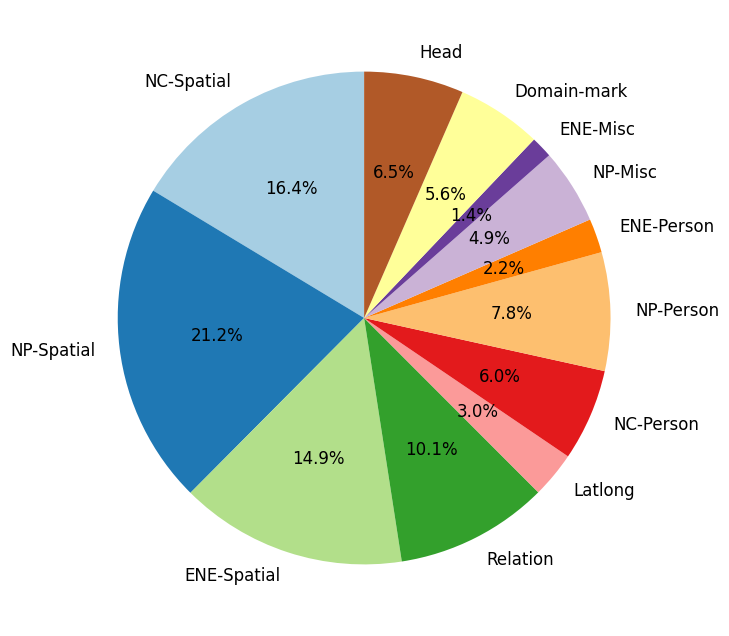

In [9]:
data_train = df[df.dataset == 'dev'].to_dict(orient='records')

spans = get_number_spans(data_train)
print(spans)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

{'Head': 154, 'Domain-mark': 133, 'NC-Spatial': 357, 'ENE-Spatial': 334, 'NP-Spatial': 522, 'Relation': 226, 'Latlong': 72, 'NC-Person': 133, 'NP-Person': 150, 'NP-Misc': 96, 'ENE-Person': 57, 'ENE-Misc': 22}


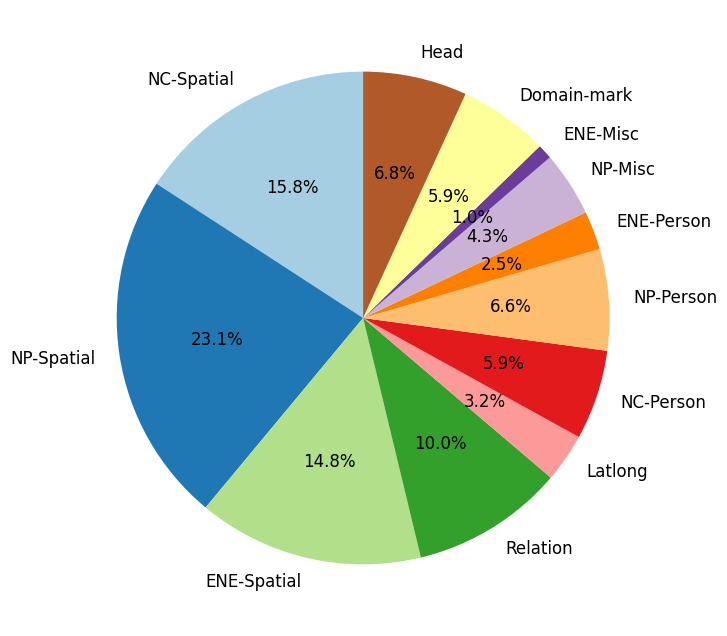

In [10]:
data_train = df[df.dataset == 'val'].to_dict(orient='records')

spans = get_number_spans(data_train)
print(spans)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)